In [1]:
# import
import matplotlib.pyplot as plt   # plot the pictures
import pandas as pd
import numpy as np
import random
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read the train data CSV and change to dataframe
pm25_CSV_train = 'pm25traindata.csv'
pm25_trainData = pd.read_csv(pm25_CSV_train, low_memory = False)
pm25_traindf = pd.DataFrame(pm25_trainData)
print("Train Data :",pm25_traindf.shape)
pm25_traindf.head(20)

Train Data : (2376, 27)


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2016/01/01,基隆,AMB_TEMP,17,17,17,16,16,17,17,...,19,19,19,19,18,18,18,18,18,18
1,2016/01/01,基隆,CH4,1.7,0.1,-0.3,-0.3,-0.3,-0.3,-0.3,...,1.8,1.7,1.7,2,2.4,2.5,2.7,2.6,2.7,2.7
2,2016/01/01,基隆,CO,0.36,0.31,0.3,0.3,0.29,0.32,0.43,...,0.43,0.42,0.58,1.1,1.64,1.7,1.73,1.73,1.68,1.44
3,2016/01/01,基隆,NMHC,0.08,0.01,0.04,0.04,0.04,0.1,0.12,...,0.17,0.17,0.24,0.48,0.91,0.94,0.87,0.84,0.78,0.71
4,2016/01/01,基隆,NO,1.2,1.1,1,1.1,1.1,1.3,1.6,...,4.4,3.1,5.3,10,45,45,51,56,60,48
5,2016/01/01,基隆,NO2,4.2,4.4,5.1,3.2,3.3,5.1,12,...,26,20,26,31,30,29,26,25,25,24
6,2016/01/01,基隆,NOx,5.4,5.5,6.1,4.3,4.4,6.3,13,...,31,23,31,41,75,74,77,81,85,71
7,2016/01/01,基隆,O3,52,48,47,47,45,41,34,...,18,24,12,3.8,2,1.8,1.8,1.7,1.7,1.5
8,2016/01/01,基隆,PM10,68,53,58,53,52,48,51,...,58,58,58,54,56,57,50,47,43,35
9,2016/01/01,基隆,PM2.5,45,34,35,35,32,30,31,...,34,34,35,37,41,41,37,34,31,28


In [3]:
# read the test data CSV and change to dataframe
pm25_CSV_test = 'pm25testdata.csv'
pm25_testData = pd.read_csv(pm25_CSV_test, low_memory = False)
pm25_testdf = pd.DataFrame(pm25_testData)
print("Test Data :",pm25_testdf.shape)
pm25_testdf.head(20)

Test Data : (2159, 26)


,data_0,AMB_TEMP,17,17.1,17.2,17.3,16,16.1,16.2,17.4,...,16.3,15,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8
0,data_0,CH4,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,...,1.6,1.6,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7
1,data_0,CO,0.23,0.24,0.23,0.22,0.22,0.23,0.27,0.35,...,0.26,0.26,0.28,0.31,0.29,0.3,0.3,0.32,0.3,0.29
2,data_0,NMHC,0.03,0.03,0.04,0.03,0.04,0.04,0.05,0.09,...,0.07,0.08,0.09,0.1,0.08,0.07,0.06,0.07,0.06,0.06
3,data_0,NO,0.6,0.5,0.4,0.7,0.9,0.8,1,1.6,...,1.1,1.2,1,1.2,1.1,1.1,1.1,1,1,0.8
4,data_0,NO2,7.1,3.9,2.8,1,1.8,1.6,3.1,6.3,...,3.4,4,4.7,5.5,4.1,3.6,3.8,4.3,3.5,2.7
5,data_0,NOx,7.7,4.4,3.1,1.8,2.7,2.4,4.1,7.9,...,4.5,5.2,5.7,6.8,5.2,4.7,4.9,5.3,4.5,3.5
6,data_0,O3,37,39,41,41,40,40,39,36,...,39,39,40,39,42,42,42,41,41,42
7,data_0,PM10,22,18,17,21,25,23,21,22,...,30,33,32,34,35,34,32,28,25,18
8,data_0,PM2.5,10,5,4,6,10,8,8,6,...,14,18,17,21,22,23,21,21,19,8
9,data_0,RAINFALL,NR,0.2,0.2,0.2,0.6,1,0.2,NR,...,0.6,1.8,0.6,1.8,1.8,3,1.8,2,3,2.6


In [4]:
# get the pm2.5 rows of train data
pm25_trainData = pm25_traindf[pm25_traindf['測項']=='PM2.5']
print("Train Data of pm2.5 :")
pm25_trainData.head()

Train Data of pm2.5 :


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
9,2016/01/01,基隆,PM2.5,45,34,35,35,32,30,31,...,34,34,35,37,41,41,37,34,31,28
27,2016/01/02,基隆,PM2.5,27,24,16,19,22,26,26,...,40,38,40,42,43,51,51,49,49,41
45,2016/01/03,基隆,PM2.5,41,38,34,31,26,31,28,...,13,3,5,10,13,13,12,17,12,9
63,2016/01/04,基隆,PM2.5,2,9,8,8,8,6,6,...,9,14,18,10,19,9,19,18,19,16
81,2016/01/05,基隆,PM2.5,19,14,17,14,16,18,19,...,8,9,11,10,12,12,10,10,8,9


In [5]:
# get the pm2.5 rows of test data
pm25_testData = pm25_testdf[pm25_testdf['AMB_TEMP']=='PM2.5']
print("Test Data of pm2.5 :")
pm25_testData.head()

Test Data of pm2.5 :


,data_0,AMB_TEMP,17,17.1,17.2,17.3,16,16.1,16.2,17.4,...,16.3,15,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8
8,data_0,PM2.5,10,5,4,6,10,8,8,6,...,14,18,17,21,22,23,21,21,19,8
26,data_0,PM2.5,6,8,9,12,13,14,13,13,...,15,12,11,15,17,21,24,25,32,34
44,data_0,PM2.5,29,30,31,30,37,38,42,43,...,42,41,40,41,39,40,39,39,38,36
62,data_0,PM2.5,35,35,35,34,31,34,34,42,...,35,35,29,36,29,25,21,25,24,21
80,data_0,PM2.5,25,21,18,9,10,10,11,12,...,12,8,9,16,12,11,10,15,16,17


In [6]:
# get the pm2.5 value of train data
pm25Train = pm25_trainData.ix[:,3:]
print("Train Data of pm2.5 :")
pm25Train.head()

Train Data of pm2.5 :


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
9,45,34,35,35,32,30,31,29,29,24,...,34,34,35,37,41,41,37,34,31,28
27,27,24,16,19,22,26,26,30,29,27,...,40,38,40,42,43,51,51,49,49,41
45,41,38,34,31,26,31,28,36,35,26,...,13,3,5,10,13,13,12,17,12,9
63,2,9,8,8,8,6,6,12,19,8,...,9,14,18,10,19,9,19,18,19,16
81,19,14,17,14,16,18,19,21,26,36,...,8,9,11,10,12,12,10,10,8,9


In [7]:
# get the pm2.5 value of test data
pm25Test = pm25_testData.ix[:,2:]
print("Test Data of pm2.5 :")
pm25Test.head()

Test Data of pm2.5 :


,17,17.1,17.2,17.3,16,16.1,16.2,17.4,17.5,17.6,...,16.3,15,15.1,15.2,15.3,15.4,15.5,15.6,15.7,15.8
8,10,5,4,6,10,8,8,6,6,6,...,14,18,17,21,22,23,21,21,19,8
26,6,8,9,12,13,14,13,13,14,15,...,15,12,11,15,17,21,24,25,32,34
44,29,30,31,30,37,38,42,43,46,48,...,42,41,40,41,39,40,39,39,38,36
62,35,35,35,34,31,34,34,42,40,39,...,35,35,29,36,29,25,21,25,24,21
80,25,21,18,9,10,10,11,12,14,19,...,12,8,9,16,12,11,10,15,16,17


In [8]:
# print the train and test data information
print("pm2.5 train data :",pm25Train.shape)
print("days of train data :",pm25Train.shape[0])
print("one day :",pm25Train.shape[1],"datas")

print("\n")

print("pm2.5 test data :",pm25Test.shape)
print("days of test data :",pm25Test.shape[0])
print("one day :",pm25Test.shape[1],"datas")

pm2.5 train data : (132, 24)
days of train data : 132
one day : 24 datas


pm2.5 test data : (120, 24)
days of test data : 120
one day : 24 datas


In [9]:
# change NAN to 0
replace = '0'
pm25Train = pm25Train.fillna(replace)
pm25Test = pm25Test.fillna(replace)

# change dataframe to ndarray
nd_pm25Train = pm25Train.values
print(type(nd_pm25Train))
print(nd_pm25Train)
print("\n")
nd_pm25Test = pm25Test.values
print(type(nd_pm25Test))
print(nd_pm25Test)

# change the elements in ndarray 'str' to 'int'
print("\n")
nd_pm25Train = nd_pm25Train.astype(int)
nd_pm25Test = nd_pm25Test.astype(int)
print(type(nd_pm25Train[0][0]))
print(type(nd_pm25Test[0][0]))

<class 'numpy.ndarray'>
[['45' '34' '35' ... '34' '31' '28']
 ['27' '24' '16' ... '49' '49' '41']
 ['41' '38' '34' ... '17' '12' '9']
 ...
 ['4' '3' '4' ... '8' '8' '6']
 ['8' '6' '6' ... '16' '13' '15']
 ['13' '14' '13' ... '5' '6' '8']]


<class 'numpy.ndarray'>
[['10' '5' '4' ... '21' '19' '8']
 ['6' '8' '9' ... '25' '32' '34']
 ['29' '30' '31' ... '39' '38' '36']
 ...
 ['2' '2' '4' ... '2' '4' '3']
 ['1' '3' '1' ... '2' '1' '1']
 ['2' '1' '1' ... '37' '39' '36']]


<class 'numpy.int32'>
<class 'numpy.int32'>


In [10]:
print(nd_pm25Train.mean())
print(nd_pm25Test.mean())

14.234532828282829
13.606944444444444


In [11]:
Train_input = []
for i in nd_pm25Train:
    Train_input.append(i.mean())
    
Train_output = Train_input

Train_input = Train_input[0:len(Train_input)-1]
Train_output = Train_output[1:len(Train_input)+1]

print('Train input length :',len(Train_input),'Train output length :',len(Train_output))
print('Train input[1] :',Train_input[1],'Train output[0] :',Train_output[0])

Train input length : 131 Train output length : 131
Train input[1] : 33.75 Train output[0] : 33.75


In [12]:
Test_input = []
for i in nd_pm25Test:
    Test_input.append(i.mean())
    
Test_output = Test_input

Test_input = Test_input[0:len(Test_input)-1]
Test_output = Test_output[1:len(Test_input)+1]

print('Test input length :',len(Test_input),'Test output length :',len(Test_output))
print('Test input[1] :',Test_input[1],'Test output[0] :',Test_output[0])

Test input length : 119 Test output length : 119
Test input[1] : 15.75 Test output[0] : 15.75


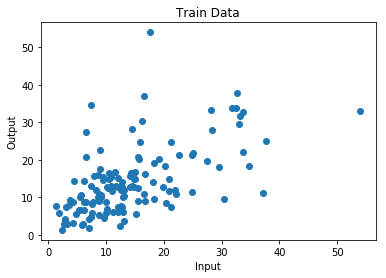

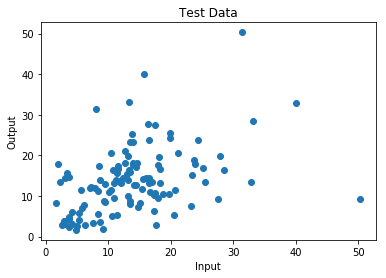

In [13]:
plt.title('Train Data')
plt.xlabel('Input')
plt.ylabel('Output')
plt.scatter(Train_input,Train_output)
plt.savefig('Train Data.png')
plt.show()

plt.title('Test Data')
plt.xlabel('Input')
plt.ylabel('Output')
plt.scatter(Test_input,Test_output)
plt.savefig('Test Data.png')
plt.show()

In [14]:
# one order parameters setting
loss = 0
loss_history = []
loss_test_history = []
loss_flag = True
iteration = 0
lr = 0.000000001

bias = random.uniform(0, 1)
weight = random.uniform(0, 1)
print("Bias value is",bias)
print("Weight value is",weight)

Bias value is 0.18920029125364812
Weight value is 0.5512049788019737


learning rate : 1e-09
iteration : 11200
train MSE : 394.2856610781247
test MSE : 94.19829158992344
bias : 0.2494416321611838
weight : 1.1845076151543918


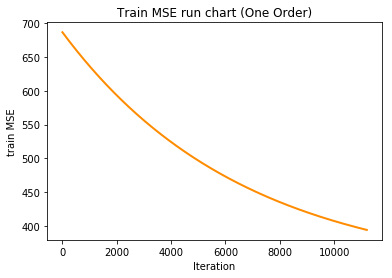

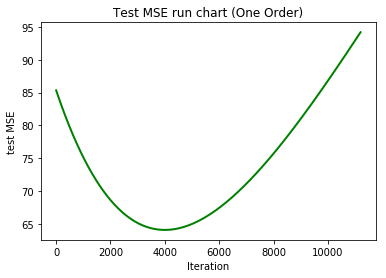

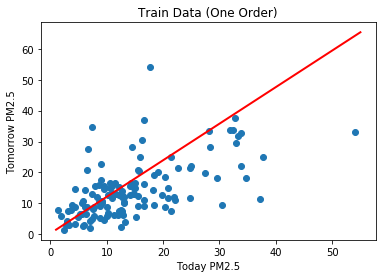

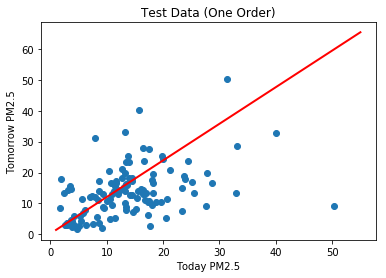

In [15]:
# one order train
while (loss_flag):
    
    predict = 0       # initialize
    loss = 0
    loss_test = 0
    weight_changeValue = 0
    bias_changeValue = 0
    iteration = iteration + 1
    seq = 0
    
    for today in Train_input:      # compute the loss and training the data
        predict = bias + weight*today      
        loss = loss + (Train_output[seq]-predict)*(Train_output[seq]-predict)
        
        weight_changeValue_temp = 2*(Train_output[seq]-predict)*(-today)        
        bias_changeValue_temp = 2*(Train_output[seq]-predict)*(-1)
        
        weight_changeValue = weight_changeValue + weight_changeValue_temp
        bias_changeValue = bias_changeValue + bias_changeValue_temp
        
    for tomorrow in Test_input:  # compute the test loss
        test_predict = bias + weight*tomorrow
        loss_test = loss_test + (test_predict-Test_output[seq])*(test_predict-Test_output[seq])
    
    weight = weight - lr*weight_changeValue   # renew the parameters
    bias = bias - lr*bias_changeValue
    
    loss = loss/len(Train_input)              # record the loss
    loss_test = loss_test / len(Test_input) 
    
    loss_history.append(loss)
    loss_test_history.append(loss_test)
    
    seq = seq + 1
    if(iteration>3):                          # the min allow loss
        if(loss<50 or abs(loss_history[iteration-1] - loss_history[iteration-2])<0.01):
            loss_flag = False
            
# show the training result
print("learning rate :",lr)
print("iteration :",iteration)
print("train MSE :",loss)
print("test MSE :",loss_test)
print("bias :",bias)
print("weight :",weight)

plt.title('Train MSE run chart (One Order)')
plt.xlabel('Iteration')
plt.ylabel('train MSE')
plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
plt.savefig('Train MSE run chart (One Order).png')
plt.show()

plt.title('Test MSE run chart (One Order)')
plt.xlabel('Iteration')
plt.ylabel('test MSE')
plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='green')
plt.savefig('Test MSE run chart (One Order).png')
plt.show()

xRegression = np.linspace(1,55)
yRegression = bias + weight * xRegression
plt.title('Train Data (One Order)')
plt.xlabel('Today PM2.5')
plt.ylabel('Tomorrow PM2.5')
plt.scatter(Train_input, Train_output)
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Train Data (One Order).png')
plt.show()

plt.title('Test Data (One Order)')
plt.xlabel('Today PM2.5')
plt.ylabel('Tomorrow PM2.5')
plt.scatter(Test_input, Test_output)
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Test Data (One Order).png')
plt.show()

In [16]:
# second order parameters setting
loss = 0
loss_history = []
loss_test_history = []
loss_flag = True
iteration = 0
lr = 0.0000000005          # the value of lr need to be lower and lower in this case

bias = random.uniform(0, 1)
weight1 = random.uniform(0, 1)
weight2 = random.uniform(0, 1)
print("bias value is",bias)
print("weight1 value is",weight1)
print("weight2 value is",weight2)

bias value is 0.503806614359286
weight1 value is 0.9622492476872219
weight2 value is 0.43428398479870023


learning rate : 5e-10
iteration : 208
train MSE : 439.427982522405
test MSE : 124.2754413476047
bias : 0.5037527059349324
weight1 : 0.9522689629152282
weight2 : 0.010646732203410097


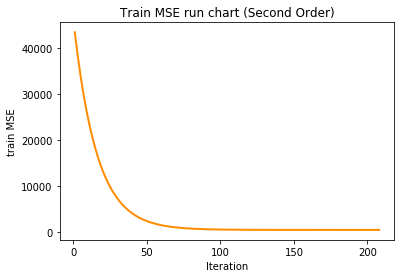

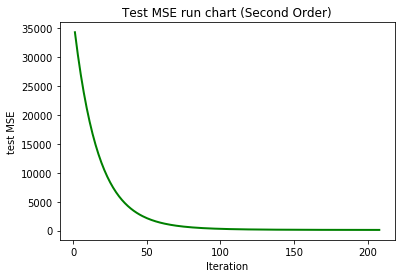

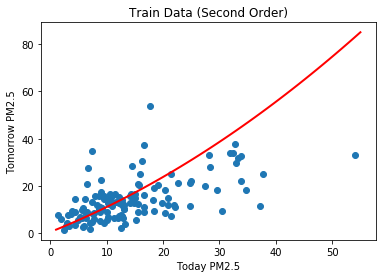

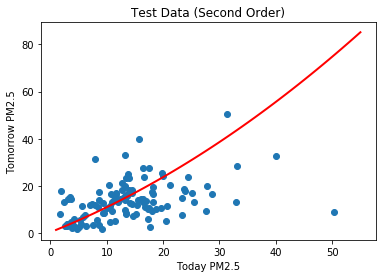

In [17]:
# second order train
while (loss_flag):
    
    predict = 0       # initialize
    temp_loss = 0
    loss = 0
    loss_test = 0
    weight1_changeValue = 0
    weight2_changeValue = 0
    bias_changeValue = 0
    iteration = iteration + 1
    seq = 0
    
    for today in Train_input:      # compute the loss and training the data
        predict = bias + weight1*today + weight2*today*today    
        loss = loss + (Train_output[seq]-predict)*(Train_output[seq]-predict)
        
        weight1_changeValue_temp = 2*(Train_output[seq]-predict)*(-today)
        weight2_changeValue_temp = 2*(Train_output[seq]-predict)*(-today*today)
        bias_changeValue_temp = 2*(Train_output[seq]-predict)*(-1)
        
        weight1_changeValue = weight1_changeValue + weight1_changeValue_temp
        weight2_changeValue = weight2_changeValue + weight2_changeValue_temp
        bias_changeValue = bias_changeValue + bias_changeValue_temp
        
    for tomorrow in Test_input:  # compute the test loss
        test_predict = bias + weight1*tomorrow + weight2*tomorrow*tomorrow
        loss_test = loss_test + (test_predict-Test_output[seq])*(test_predict-Test_output[seq])
    
    weight1 = weight1 - lr*weight1_changeValue  # renew the parameters
    weight2 = weight2 - lr*weight2_changeValue
    bias = bias - lr*bias_changeValue
    
    loss = (loss/len(Train_input))               # record the loss
    loss_test = (loss_test / len(Test_input))
    loss_history.append(loss)
    loss_test_history.append(loss_test)
    
    seq = seq + 1
    if(iteration>3):                          # the min allow loss
        if(loss<50 or abs(loss_history[iteration-1] - loss_history[iteration-2])<0.01):
            loss_flag = False
            
# show the training result
print("learning rate :",lr)
print("iteration :",iteration)
print("train MSE :",loss)
print("test MSE :",loss_test)
print("bias :",bias)
print("weight1 :",weight1)
print("weight2 :",weight2)

plt.title('Train MSE run chart (Second Order)')
plt.xlabel('Iteration')
plt.ylabel('train MSE')
plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
plt.savefig('Train MSE run chart (Second Order).png')
plt.show()

plt.title('Test MSE run chart (Second Order)')
plt.xlabel('Iteration')
plt.ylabel('test MSE')
plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='green')
plt.savefig('Test MSE run chart (Second Order).png')
plt.show()

xRegression = np.linspace(1,55)
yRegression = bias + weight1 * xRegression + weight2 * xRegression ** 2
plt.title('Train Data (Second Order)')
plt.xlabel('Today PM2.5')
plt.ylabel('Tomorrow PM2.5')
plt.scatter(Train_input, Train_output)
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Train Data (Second Order).png')
plt.show()

plt.title('Test Data (Second Order)')
plt.xlabel('Today PM2.5')
plt.ylabel('Tomorrow PM2.5')
plt.scatter(Test_input, Test_output)
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Test Data (Second Order).png')
plt.show()

In [18]:
# third order parameters setting
loss = 0
loss_history = []
loss_test_history = []
loss_flag = True
iteration = 0
lr = 0.0000000000001          # the value of lr need to be lower and lower in this case

bias = random.uniform(0, 1)
weight1 = random.uniform(0, 0.1)
weight2 = random.uniform(0, 0.1)
weight3 = random.uniform(0, 0.01)
print("bias value is",bias)
print("weight1 value is",weight1)
print("weight2 value is",weight2)
print("weight3 value is",weight3)

bias value is 0.3553265120124388
weight1 value is 0.029509003521412613
weight2 value is 0.03968858075354734
weight3 value is 0.009889994607992064


learning rate : 1e-13
iteration : 603
train MSE : 691.2528929974609
test MSE : 143.2820883577156
bias : 0.35532667062941126
weight1 : 0.029505901486328548
weight2 : 0.039476813347493894
weight3 : -0.00024190305205881875


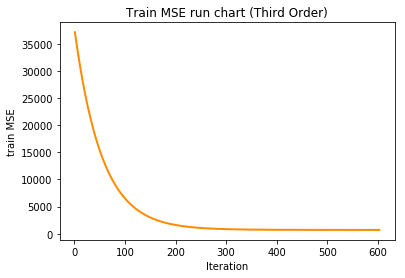

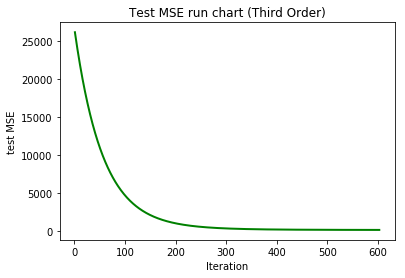

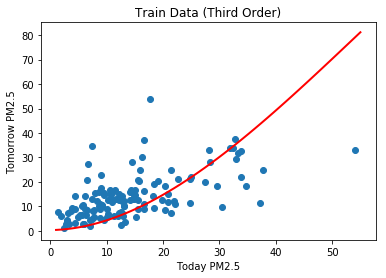

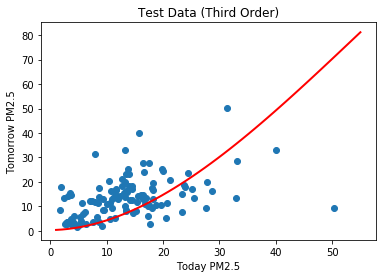

In [23]:
# third order train
while (loss_flag):
    
    predict = 0       # initialize
    temp_loss = 0
    loss = 0
    loss_test = 0
    weight1_changeValue = 0
    weight2_changeValue = 0
    weight3_changeValue = 0
    bias_changeValue = 0
    iteration = iteration + 1
    seq = 0
    
    for today in Train_input:      # compute the loss and training the data
        predict = bias + weight1*today + weight2*today*today + weight3*today*today*today
        loss = loss + (Train_output[seq]-predict)*(Train_output[seq]-predict)
        
        weight1_changeValue_temp = 2*(Train_output[seq]-predict)*(-today)
        weight2_changeValue_temp = 2*(Train_output[seq]-predict)*(-today*today)
        weight3_changeValue_temp = 2*(Train_output[seq]-predict)*(-today*today*today)
        bias_changeValue_temp = 2*(Train_output[seq]-predict)*(-1)
        
        weight1_changeValue = weight1_changeValue + weight1_changeValue_temp
        weight2_changeValue = weight2_changeValue + weight2_changeValue_temp
        weight3_changeValue = weight3_changeValue + weight3_changeValue_temp
        bias_changeValue = bias_changeValue + bias_changeValue_temp
        
    for tomorrow in Test_input:  # compute the test loss
        test_predict = bias + weight1*tomorrow + weight2*tomorrow*tomorrow + weight3*tomorrow*tomorrow*tomorrow
        loss_test = loss_test + (test_predict-Test_output[seq])*(test_predict-Test_output[seq])      
    
    weight1 = weight1 - lr*weight1_changeValue   # renew the parameters
    weight2 = weight2 - lr*weight2_changeValue
    weight3 = weight3 - lr*weight3_changeValue
    bias = bias - lr*bias_changeValue
    
    loss = loss/len(Train_input)               # record the loss
    loss_test = loss_test / len(Test_input)
    loss_history.append(loss)
    loss_test_history.append(loss_test)
    
    seq = seq + 1
    if(iteration>3):                          # the min allow loss
        if(loss<50 or abs(loss_history[iteration-1] - loss_history[iteration-2])<0.01):
            loss_flag = False

# show the training result
print("learning rate :",lr)
print("iteration :",iteration)
print("train MSE :",loss)
print("test MSE :",loss_test)
print("bias :",bias)
print("weight1 :",weight1)
print("weight2 :",weight2)
print("weight3 :",weight3)

plt.title('Train MSE run chart (Third Order)')
plt.xlabel('Iteration')
plt.ylabel('train MSE')
plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
plt.savefig('Train MSE run chart (Third Order).png')
plt.show()

plt.title('Test MSE run chart (Third Order)')
plt.xlabel('Iteration')
plt.ylabel('test MSE')
plt.plot(range(1,len(loss_test_history)+1), loss_test_history, lw = 2, c='green')
plt.savefig('Test MSE run chart (Third Order).png')
plt.show()

xRegression = np.linspace(1,55)
yRegression = bias + weight1 * xRegression + weight2 * xRegression**2 + weight3 * xRegression**3
plt.title('Train Data (Third Order)')
plt.xlabel('Today PM2.5')
plt.ylabel('Tomorrow PM2.5')
plt.scatter(Train_input, Train_output)
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Train Data (Third Order).png')
plt.show()

plt.title('Test Data (Third Order)')
plt.xlabel('Today PM2.5')
plt.ylabel('Tomorrow PM2.5')
plt.scatter(Test_input, Test_output)
plt.plot(xRegression, yRegression, lw=2, c='red') 
plt.savefig('Test Data (Third Order).png')
plt.show()